<a href="https://colab.research.google.com/github/Zohrae/TPDM/blob/main/TP02_DM_%26_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
iris = load_iris()

data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
def normalize_column(col):
    min_val = np.min(col)
    max_val = np.max(col)
    return (col - min_val) / (max_val - min_val)

# Application sur toutes les colonnes sauf la cible
data_norm = data.copy()
for c in data.columns[:-1]:
    data_norm[c] = normalize_column(data[c])

print(data_norm.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0           0.222222          0.625000           0.067797          0.041667   
1           0.166667          0.416667           0.067797          0.041667   
2           0.111111          0.500000           0.050847          0.041667   
3           0.083333          0.458333           0.084746          0.041667   
4           0.194444          0.666667           0.067797          0.041667   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [ ]:
from collections import Counter

# Distance euclidienne manuelle
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

# Implémentation de KNN
def knn_predict(X_train, y_train, x_test, k=3):
    distances = []
    for i in range(len(X_train)):
        dist = euclidean_distance(X_train[i], x_test)
        distances.append((dist, y_train[i]))
    distances.sort(key=lambda x: x[0])

    # Prendre les k plus proches voisins
    k_neighbors = [label for (_, label) in distances[:k]]
    # Classe majoritaire
    most_common = Counter(k_neighbors).most_common(1)[0][0]
    return most_common

# Séparation train/test (manuelle)
np.random.seed(0)
indices = np.random.permutation(len(data_norm))
train_size = int(0.7 * len(data_norm))
train_idx, test_idx = indices[:train_size], indices[train_size:]

X_train = data_norm.iloc[train_idx, :-1].values
y_train = data_norm.iloc[train_idx, -1].values
X_test  = data_norm.iloc[test_idx, :-1].values
y_test  = data_norm.iloc[test_idx, -1].values

# Prédiction
y_pred = [knn_predict(X_train, y_train, x, k=3) for x in X_test]

# Taux de précision
accuracy = np.mean(np.array(y_pred) == y_test)
print("Précision du modèle KNN :", round(accuracy * 100, 2), "%")

Précision du modèle KNN : 95.56 %


In [ ]:
# Exemple : comparer la 1ère fleur (Setosa) et la 60e (Versicolor)
x1, x2 = X_train[0], X_train[60]

# Distance Euclidienne
d_euclid = np.sqrt(np.sum((x1 - x2)**2))

# Distance Manhattan
d_manhattan = np.sum(np.abs(x1 - x2))

# Similarité Cosine
sim_cosine = np.dot(x1, x2) / (np.linalg.norm(x1) * np.linalg.norm(x2))

# Jaccard et Dice sur binarisation (valeurs > 0.5)
b1, b2 = x1 > 0.5, x2 > 0.5
sim_jaccard = np.sum(b1 & b2) / np.sum(b1 | b2)
sim_dice = (2 * np.sum(b1 & b2)) / (np.sum(b1) + np.sum(b2))

# Corrélation de Pearson
sim_corr = np.corrcoef(x1, x2)[0,1]

print("Euclidienne:", d_euclid)
print("Manhattan:", d_manhattan)
print("Cosine:", sim_cosine)
print("Jaccard:", sim_jaccard)
print("Dice:", sim_dice)
print("Corrélation:", sim_corr)

Euclidienne: 0.43248050436148444
Manhattan: 0.7405838041431261
Cosine: 0.9451471873588176
Jaccard: 0.6666666666666666
Dice: 0.8
Corrélation: 0.6396266060482632


Matrice de confusion :
 [[17  0  0]
 [ 0 14  2]
 [ 0  0 12]]
Précision moyenne : 0.95
Rappel moyen : 0.96
F1-score moyen : 0.96


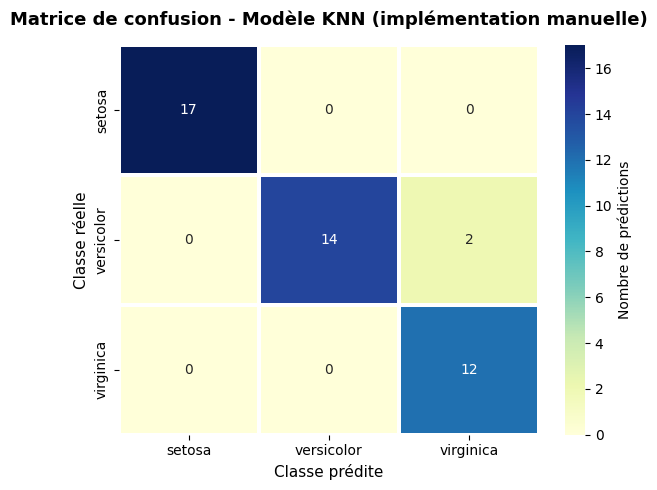

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Création de la matrice de confusion manuelle
labels = np.unique(y_test)
conf_matrix = np.zeros((len(labels), len(labels)), dtype=int)

for true, pred in zip(y_test, y_pred):
    conf_matrix[int(true), int(pred)] += 1

print("Matrice de confusion :\n", conf_matrix)

# Calcul des mesures à partir de la matrice
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
precision = np.mean(TP / (TP + FP))
recall = np.mean(TP / (TP + FN))
f1 = 2 * (precision * recall) / (precision + recall)

print(f"Précision moyenne : {precision:.2f}")
print(f"Rappel moyen : {recall:.2f}")
print(f"F1-score moyen : {f1:.2f}")

# ------------------------------
# 🎨 Visualisation colorée
# ------------------------------
plt.figure(figsize=(6,5))
sns.heatmap(
    conf_matrix,
    annot=True, fmt="d", cmap="YlGnBu", linewidths=1.5,
    xticklabels=iris.target_names,
    yticklabels=iris.target_names,
    cbar_kws={'label': 'Nombre de prédictions'}
)

plt.title("Matrice de confusion - Modèle KNN (implémentation manuelle)", fontsize=13, fontweight='bold', pad=15)
plt.xlabel("Classe prédite", fontsize=11)
plt.ylabel("Classe réelle", fontsize=11)
plt.tight_layout()
plt.show()
